# <font color='blue'> Descarga y preparación de datos </font>

El objetivo de este _notebook_ es, partiendo de la lista de componentes del _Índice de Precios y Cotizaciones_ de la Bolsa Mexicana de valores ([**BMV/IPC**](https://www.bmv.com.mx/es/indices/principales/)), obtener las series de tiempo de sus precios desde [Yahoo Finance](https://finance.yahoo.com/).

El lenguaje de programación utilizado es [`Python 3`](https://www.python.org/about/).

## <font color='crimson'> Preámbulos </font>

Un paquete muy útil para nuestro proposito es [`yahoofinancials`](https://pypi.org/project/yahoofinancials/).

Importar bibliotecas o módulos:

In [1]:
from yahoofinancials import YahooFinancials as yf
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Como primer ejemplo, vamos a descargar el índice a partir de su [símbolo bursátil](https://www.investopedia.com/terms/s/stocksymbol.asp) (_ticker symbol_, o simplemente _ticker_). 

> **Nota**: Todas las compañías que componen el **BMV/IPC** pueden obtenerse de [esta](https://espanol.spindices.com/indices/equity/sp-bmv-ipc) página.

In [72]:
bmvIndexTicker = '^MXX' #Este es el ticker del índice del IPC
bmvIndex = yf(bmvIndexTicker)

bmvSummaryData=bmvIndex.get_summary_data(
    reformat=True
)

In [73]:
print(
    json.dumps(
        bmvSummaryData,
        ensure_ascii=False,
        indent=4
    )
)

{
    "^MXX": {
        "maxAge": 1,
        "priceHint": 2,
        "previousClose": 55180.97,
        "open": 55309.02,
        "dayLow": 55005.06,
        "dayHigh": 55441.67,
        "regularMarketPreviousClose": 55180.97,
        "regularMarketOpen": 55309.02,
        "regularMarketDayLow": 55005.06,
        "regularMarketDayHigh": 55441.67,
        "volume": 172672225,
        "regularMarketVolume": 172672225,
        "averageVolume": 179487975,
        "averageVolume10days": 175580010,
        "averageDailyVolume10Day": 175580010,
        "bid": 0.0,
        "ask": 0.0,
        "bidSize": 0,
        "askSize": 0,
        "fiftyTwoWeekLow": 44518.73,
        "fiftyTwoWeekHigh": 55626.51,
        "fiftyDayAverage": 53997.29,
        "twoHundredDayAverage": 50780.613,
        "currency": "MXN",
        "fromCurrency": null,
        "toCurrency": null,
        "lastMarket": null,
        "coinMarketCapLink": null,
        "algorithm": null,
        "tradeable": false
    }
}


Conseguir datos históricos:

In [4]:
dateFirst='2008-09-15' #formato YYYY-MM-DD
dateLast='2022-05-17'

In [5]:
bmvHistoricalPrices = bmvIndex.get_historical_price_data(
    dateFirst,
    dateLast,
    'daily'
)

Examinar la estructura de los datos descargados:

In [6]:
type(bmvHistoricalPrices)

dict

In [7]:
bmvHistoricalPrices.keys()

dict_keys(['^MXX'])

In [8]:
bmvHistoricalPrices[bmvIndexTicker].keys()

dict_keys(['eventsData', 'firstTradeDate', 'currency', 'instrumentType', 'timeZone', 'prices'])

In [9]:
type(bmvHistoricalPrices[bmvIndexTicker]['prices'])

list

Ver algunos precios:

In [10]:
print(
    json.dumps(
        bmvHistoricalPrices[bmvIndexTicker]['prices'][0:3],
        indent=4,
        ensure_ascii=False
    )
)

[
    {
        "date": 1221485400,
        "high": 25427.69921875,
        "low": 24610.5390625,
        "open": 25427.69921875,
        "close": 24618.150390625,
        "volume": 125304000,
        "adjclose": 24618.150390625,
        "formatted_date": "2008-09-15"
    },
    {
        "date": 1221658200,
        "high": 24722.69921875,
        "low": 23383.6796875,
        "open": 24618.150390625,
        "close": 23456.83984375,
        "volume": 280231000,
        "adjclose": 23456.83984375,
        "formatted_date": "2008-09-17"
    },
    {
        "date": 1221744600,
        "high": 24596.990234375,
        "low": 23181.740234375,
        "open": 23457.8203125,
        "close": 24577.900390625,
        "volume": 282824600,
        "adjclose": 24577.900390625,
        "formatted_date": "2008-09-18"
    }
]


Guardar los datos:

In [11]:
dataName=f'{bmvIndexTicker}_from{dateFirst}_to{dateLast}'
location='./data'
today=!date "+%Y%m%d"
today=today[0]

with open(f'{location}/{dataName}_downloaded{today}.json','w+') as arshivo:
    json.dump(
        bmvHistoricalPrices,
        arshivo,
        ensure_ascii=False,
        indent=4
    )

Verificar que se guardó bien:

In [12]:
! head -v -n 23 '{location}/{dataName}_downloaded{today}.json'

==> ./data/^MXX_from2008-09-15_to2022-05-17_downloaded20230517.json <==
{
    "^MXX": {
        "eventsData": {},
        "firstTradeDate": {
            "formatted_date": "1991-11-08",
            "date": 689610600
        },
        "currency": "MXN",
        "instrumentType": "INDEX",
        "timeZone": {
            "gmtOffset": -21600
        },
        "prices": [
            {
                "date": 1221485400,
                "high": 25427.69921875,
                "low": 24610.5390625,
                "open": 25427.69921875,
                "close": 24618.150390625,
                "volume": 125304000,
                "adjclose": 24618.150390625,
                "formatted_date": "2008-09-15"
            },


¿Qué clase de datos hay guardados?

In [13]:
dataTypes=bmvHistoricalPrices[bmvIndexTicker]['prices'][0]
dataTypes

{'date': 1221485400,
 'high': 25427.69921875,
 'low': 24610.5390625,
 'open': 25427.69921875,
 'close': 24618.150390625,
 'volume': 125304000,
 'adjclose': 24618.150390625,
 'formatted_date': '2008-09-15'}

Crear un [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

In [14]:
priceTypes=['high','low','open','close','adjclose','volume']

bmvIndexDataFrame=pd.DataFrame(
    [
        {k:dataRecord[k] for k in priceTypes} for dataRecord in bmvHistoricalPrices[bmvIndexTicker]['prices']
    ],
    index=pd.to_datetime(
        [dataRecord['formatted_date'] for dataRecord in bmvHistoricalPrices[bmvIndexTicker]['prices']]
    ),
    
)

In [15]:
bmvIndexDataFrame.tail()

,high,low,open,close,adjclose,volume
2022-05-10,49435.539062,49005.011719,49149.191406,49115.859375,49115.859375,257006900.0
2022-05-11,49618.351562,49005.890625,49087.261719,49276.230469,49276.230469,234792100.0
2022-05-12,49732.050781,48701.250000,49061.121094,49309.320312,49309.320312,249591800.0
2022-05-13,49726.519531,49127.289062,49486.109375,49579.898438,49579.898438,212868300.0
2022-05-16,50823.039062,49472.511719,49604.949219,50563.980469,50563.980469,177674700.0


Este arreglo tiene las siguientes dimensiones:

In [16]:
bmvIndexDataFrame.shape

(3428, 6)

Graficar:

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

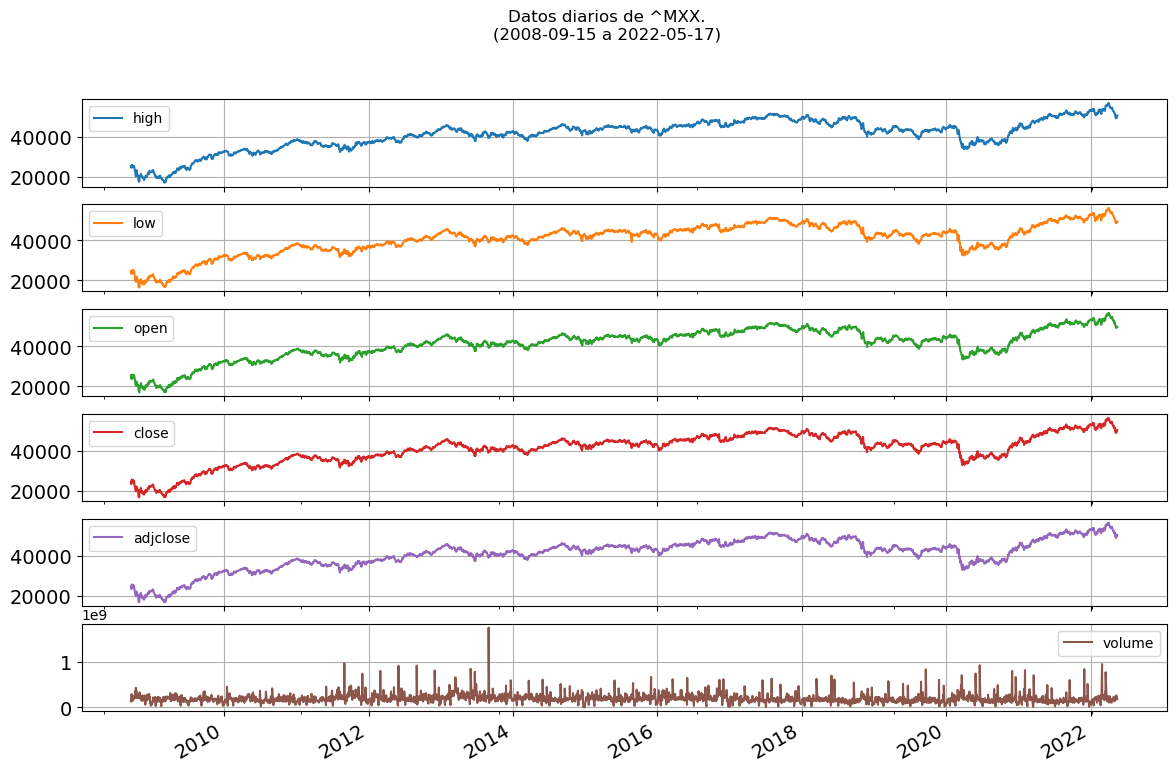

In [17]:
%matplotlib inline

bmvIndexDataFrame.plot(
    figsize=(14,9),
    subplots=True,
    grid=True,
    title=f'Datos diarios de {bmvIndexTicker}.\n({dateFirst} a {dateLast})',
    fontsize=14
)

Es importante recordar que varias de las características de los datos están en `bmvSummaryData`.

In [18]:
print(f"Los precios están expresados en {bmvSummaryData[bmvIndexTicker]['currency']}.")

Los precios están expresados en MXN.


Podemos obtener los rendimientos de las series de tiempo:
* Porcentuales: $\displaystyle X_i(t+1)=\frac{P_{i+1}(t)-P_{i}(t)}{P_{i}(t)}$
* **Logarítmicos**: $\displaystyle X_i(t+1)=\log\left(\frac{P_{i+1}(t)}{P_{i}(t)}\right)=\log\left(P_{i+1}(t)\right) - \log\left(P_{i}(t)\right)$
> **Nota**: Como 
> 
> * $\displaystyle \frac{P_{i+1}(t)}{P_{i}(t)}=\frac{P_{i+1}(t)-P_{i}(t)}{P_{i}(t)}+1$
> * $\displaystyle \log(1+x)=\sum_{n=0}^{\infty} (-1)^n \frac{x^{n+1}}{n+1}\approx x-\frac{x^2}{2}+\mathcal{O}(3)$ 
>
> entonces los rendimientos logarítmicos son casi los porcentuales cuando éstos son pequeños en comparación con 1.

In [19]:
bmvIndexReturns=np.log(bmvIndexDataFrame.loc[:, bmvIndexDataFrame.columns != 'volume']).diff(axis=0)
bmvIndexReturns

,high,low,open,close,adjclose
2008-09-15,NaN,NaN,NaN,NaN,NaN
2008-09-17,-0.028117,-0.051136,-0.032355,-0.048322,-0.048322
2008-09-18,-0.005098,-0.008673,-0.048280,0.046686,0.046686
2008-09-19,0.059870,0.061007,0.049168,0.044683,0.044683
2008-09-22,-0.014791,0.019754,0.042218,-0.022393,-0.022393
...,...,...,...,...,...
2022-05-10,0.000334,0.006876,-0.005475,0.001190,0.001190
2022-05-11,0.003691,0.000018,-0.001261,0.003260,0.003260
2022-05-12,0.002289,-0.006236,-0.000533,0.000671,0.000671
2022-05-13,-0.000111,0.008710,0.008625,0.005472,0.005472


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

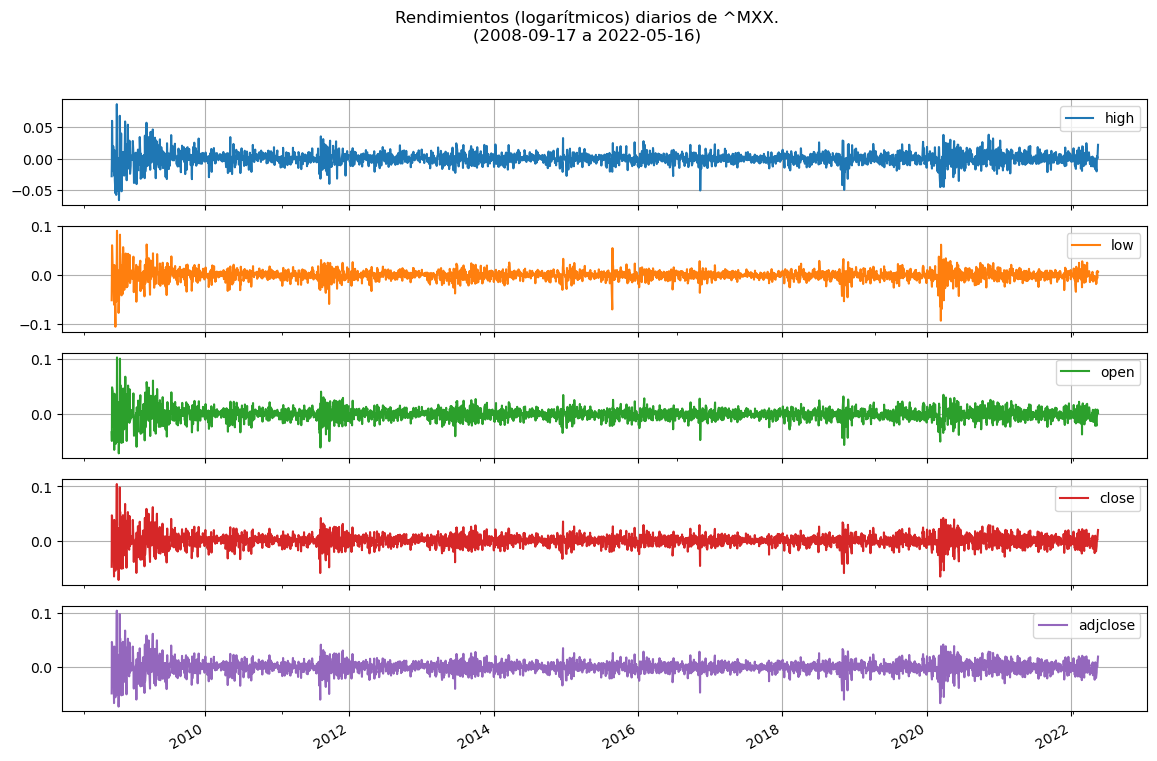

In [20]:
%matplotlib inline

bmvIndexReturns.plot(
    figsize=(14,9),
    subplots=True,
    grid=True,
    title=(f'Rendimientos (logarítmicos) diarios de {bmvIndexTicker}.\n'
    '({0:%Y-%m-%d} a {1:%Y-%m-%d})'.format(*list(bmvIndexReturns.index[[1,-1]])))
)

## <font color='crimson'> Preparación de los datos en forma columnar </font>
Muy a menudo, los datos descargados no vienen completos (aunque en la gráfica anterior no sea evidente):

In [21]:
bmvIndexReturns.isnull().sum(axis=0)

high        9
low         9
open        9
close       9
adjclose    9
dtype: int64

Es posible encontrar los registros (renglones) donde esto ocurre.

In [22]:
bmvIndexReturnsHoles=bmvIndexReturns[bmvIndexReturns.isna().any(axis=1)]
bmvIndexReturnsHoles

,high,low,open,close,adjclose
2008-09-15,NaN,NaN,NaN,NaN,NaN
2009-02-02,NaN,NaN,NaN,NaN,NaN
2009-02-03,NaN,NaN,NaN,NaN,NaN
2011-12-26,NaN,NaN,NaN,NaN,NaN
2011-12-27,NaN,NaN,NaN,NaN,NaN
2012-01-02,NaN,NaN,NaN,NaN,NaN
2012-01-03,NaN,NaN,NaN,NaN,NaN
2014-12-26,NaN,NaN,NaN,NaN,NaN
2014-12-29,NaN,NaN,NaN,NaN,NaN


El problema empieza a ser complejo cuando hay datos ausentes consecutivos (reconocibles mediante 1's consecutivos, en el siguiente arreglo).

In [23]:
bmvIndexReturnsHoles.index.to_series().diff()

2008-09-15         NaT
2009-02-02    140 days
2009-02-03      1 days
2011-12-26   1056 days
2011-12-27      1 days
2012-01-02      6 days
2012-01-03      1 days
2014-12-26   1088 days
2014-12-29      3 days
dtype: timedelta64[ns]

Una solución es hacer [una interpolación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html), estableciendo un método y una tolerancia. De acuerdo con la documentación de `**Pandas**`, los métodos disponibles (parámetro `method` en `pandas.DataFrame.interpolate`) son:
> * **‘linear’**: Ignore the index and treat the values as equally spaced. This is the only method supported on MultiIndexes.
> * **‘time’**: Works on daily and higher resolution data to interpolate given length of interval.
> * **‘index’, ‘values’**: use the actual numerical values of the index.
> * **‘pad’:** Fill in NaNs using existing values.
> * **‘nearest’**, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘spline’, ‘barycentric’, ‘polynomial’: Passed to scipy.interpolate.interp1d. These methods use the numerical values of the index. Both ‘polynomial’ and ‘spline’ require that you also specify an order (int), e.g. df.interpolate(method='polynomial', order=5).
> * **‘krogh’, ‘piecewise_polynomial’, ‘spline’, ‘pchip’, ‘akima’, ‘cubicspline’**: Wrappers around the SciPy interpolation methods of similar names. See Notes.
> * **‘from_derivatives’**: Refers to scipy.interpolate.BPoly.from_derivatives which replaces ‘piecewise_polynomial’ interpolation method in scipy 0.18.

> **Nota**: Consultado el 16/06/2022.

In [24]:
tolerancia=2

bmvIndexReturns.interpolate(
    method='cubic',
    limit_direction='both',
    limit=tolerancia,
    inplace=True #Para mutar el arreglo original
)

In [25]:
bmvIndexReturns.isnull().sum(axis=0)

high        1
low         1
open        1
close       1
adjclose    1
dtype: int64

Los únicos _huecos_ restantes son los obtenidos por la diferenciación discreta:

In [26]:
bmvIndexReturns[bmvIndexReturns.isna().any(axis=1)]

,high,low,open,close,adjclose
2008-09-15,NaN,NaN,NaN,NaN,NaN


Quitamos el renglón con datos vacíos:

In [27]:
bmvIndexReturns.dropna(
    axis='index', #También puede ser 'columns', para desechar columnas con uno o todos los registros ausentes.
    how='any', #También puede ser 'all', para tirar registros con todos los datos ausentes.
    inplace=True
)

El arreglo resultante ya no tiene _huecos_:

In [28]:
bmvIndexReturns[bmvIndexReturns.isna().any(axis=1)]

,high,low,open,close,adjclose


Ahora guardamos los datos en formato `.csv` (que es bastante estándar):

In [29]:
print(f'{location}/returns{dataName}_downloaded{today}.csv') #Este es un nombre sugerido

./data/returns^MXX_from2008-09-15_to2022-05-17_downloaded20230517.csv


In [30]:
bmvIndexReturns.to_csv(
    f'{location}/returns{dataName}_downloaded{today}.csv'
)

El archivo luce así:

In [31]:
! head -v -n 5 '{location}/returns{dataName}_downloaded{today}.csv'

==> ./data/returns^MXX_from2008-09-15_to2022-05-17_downloaded20230517.csv <==
,high,low,open,close,adjclose
2008-09-17,-0.028117281936747673,-0.051136438588036626,-0.03235510862275781,-0.04832186150505535,-0.04832186150505535
2008-09-18,-0.005097731068488542,-0.00867341986496406,-0.04828006353628034,0.04668555093371296,0.04668555093371296
2008-09-19,0.05987006873535172,0.06100702141369396,0.04916800322614456,0.044683360493072755,0.044683360493072755
2008-09-22,-0.014791441082509849,0.01975446015722504,0.04221785189800542,-0.022392681901587608,-0.022392681901587608


> **Nota**: En el archivo `.data/worldIndices_20220616.json` hay un diccionario con otros índices y sus correspondientes símbolos bursátiles.

## <font color='crimson'> Descarga de más series de tiempo </font>

In [32]:
listaTickers=['LABB.MX','GENTERA.MX','WMT.MX'] #Genomma Lab, Gentera, Walmart
bmvStocks = yf(listaTickers)
bmvHistoricalPrices=bmvStocks.get_historical_price_data(
    dateFirst,
    dateLast,
    'daily'
)

In [33]:
bmvHistoricalPrices.keys()

dict_keys(['LABB.MX', 'GENTERA.MX', 'WMT.MX'])

In [34]:
bmvHistoricalPrices['LABB.MX'].keys()

dict_keys(['eventsData', 'firstTradeDate', 'currency', 'instrumentType', 'timeZone', 'prices'])

In [35]:
print(
    json.dumps(
        bmvHistoricalPrices['LABB.MX']['prices'][0:2],
        ensure_ascii=False,
        indent=4
    )
)

[
    {
        "date": 1221485400,
        "high": 8.0,
        "low": 7.980000019073486,
        "open": 8.0,
        "close": 7.980000019073486,
        "volume": 44000,
        "adjclose": 7.01423454284668,
        "formatted_date": "2008-09-15"
    },
    {
        "date": 1221658200,
        "high": 8.0,
        "low": 7.675000190734863,
        "open": 8.0,
        "close": 7.675000190734863,
        "volume": 388000,
        "adjclose": 6.746147155761719,
        "formatted_date": "2008-09-17"
    }
]


Elegir un tipo de dato (apertura, cierre, etc.) y sincronizar:

In [60]:
kind='adjclose'
bmvStocksDataFrame=pd.DataFrame()
for stock,data in bmvHistoricalPrices.items():
    series=pd.Series(
        [d[kind] for d in data['prices']],
        index=[d['formatted_date'] for d in data['prices']],
        name=stock
    )
    bmvStocksDataFrame=pd.concat(
        [
            bmvStocksDataFrame,
            series
        ],
        axis=1
    )

del(series)

In [61]:
bmvStocksDataFrame.name=kind
bmvStocksDataFrame.index=pd.to_datetime(bmvStocksDataFrame.index)
bmvStocksDataFrame

,LABB.MX,GENTERA.MX,WMT.MX
2008-09-15,7.014235,NaN,649.106445
2008-09-17,6.746147,NaN,664.297302
2008-09-18,6.368187,NaN,664.297302
2008-09-19,6.570352,NaN,611.856873
2008-09-22,6.592326,NaN,611.856873
...,...,...,...
2022-05-10,18.047804,14.037169,3033.468262
2022-05-11,17.664007,14.377904,2993.501709
2022-05-12,17.439342,13.774435,2983.010498
2022-05-13,17.982275,13.985171,2962.527344


In [62]:
bmvStocksDataFrame.index

DatetimeIndex(['2008-09-15', '2008-09-17', '2008-09-18', '2008-09-19',
               '2008-09-22', '2008-09-23', '2008-09-24', '2008-09-25',
               '2008-09-26', '2008-09-29',
               ...
               '2022-05-03', '2022-05-04', '2022-05-05', '2022-05-06',
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16'],
              dtype='datetime64[ns]', length=3428, freq=None)

### Aplicar el mismo método de limpieza de antes

In [63]:
bmvStocksDataFrame.isnull().sum(axis=0)

LABB.MX         1
GENTERA.MX    574
WMT.MX          0
dtype: int64

In [64]:
tolerancia=2

bmvStocksDataFrame.interpolate(
    method='cubic',
    limit_direction='both',
    limit=tolerancia,
    inplace=True #Para mutar el arreglo original
)

Quitamos el renglón con datos vacíos:

In [66]:
bmvStocksDataFrame.dropna(
    axis='index',
    how='any',
    inplace=True
)

El arreglo resultante ya no tiene _huecos_:

In [67]:
bmvStocksDataFrame[bmvStocksDataFrame.isna().any(axis=1)]

,LABB.MX,GENTERA.MX,WMT.MX


Ahora guardamos los datos en formato `.csv`:

In [70]:
print(f'{location}/stockPrices_downloaded{today}.csv') #Este es un nombre sugerido

./data/stockPrices_downloaded20230517.csv


In [71]:
bmvStocksDataFrame.to_csv(
    f'{location}/stockPrices_downloaded{today}.csv'
)

In [76]:
bmvStocksDataFrame

,LABB.MX,GENTERA.MX,WMT.MX
2010-12-30,25.710072,18.476227,650.904663
2011-01-03,26.457203,18.545977,657.174255
2011-01-04,26.518732,18.427408,657.174255
2011-01-05,27.239491,17.939169,654.815674
2011-01-06,27.511972,17.688078,647.121521
...,...,...,...
2022-05-10,18.047804,14.037169,3033.468262
2022-05-11,17.664007,14.377904,2993.501709
2022-05-12,17.439342,13.774435,2983.010498
2022-05-13,17.982275,13.985171,2962.527344
